In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from math import e
import seaborn as sns
from simple_neural_net import simple_neural_net

# Neurons - The Building Blocks of Neural Networks
- Neurons in Neural Networks function in the same way as Neurons in the human brain
- In the image below we see a diagram representing a human Neuron on the left, and an Artificial Neuron from a Neural Network on the right

- At their core an individual neuron performs a simple job: Taking in a set of inputs and a set of weights and transforming them into a single output, which can then be used as input to further neurons in the network
- If the neuron is in the first or "outer" layer of the network the input is the data the network is training on, otherwise the inputs come from other neurons in the network and the weights represent the strength of the connection between the different neurons
- The neurons sum up the inputs and their weights and then transform this result using an Activation Function, which we will learn about in the next section
- Take a moment to look at the diagram of the artificial neuron and think about how information moves through it


# Activation Functions 

##### What are Activation Functions?

- Activation Functions are functions that takes in an input and transforms it into a new output
- The transformed output is non-linear and constrained to a specific range dependent on the function

##### Why are they important?
- Activation Functions are essential for Neural Networks to ensure that the networks can learn complex non-linear relationships. Without them the neurons will simply behave as linear combinations of one another and the network will be unable to learn complex patterns in the data. 

##### What do we mean by "Linear and Non-Linear" Relationships?
- Linear relationships occur when every change in x corresponds to a change in y
- This data can be modeled using the classic equation of a line, y = mx + b
- Non-Linear Data is much more complex and doesn't have a clear relationship between the x and y components of the data

##### Here is an example of perfectly linear data:

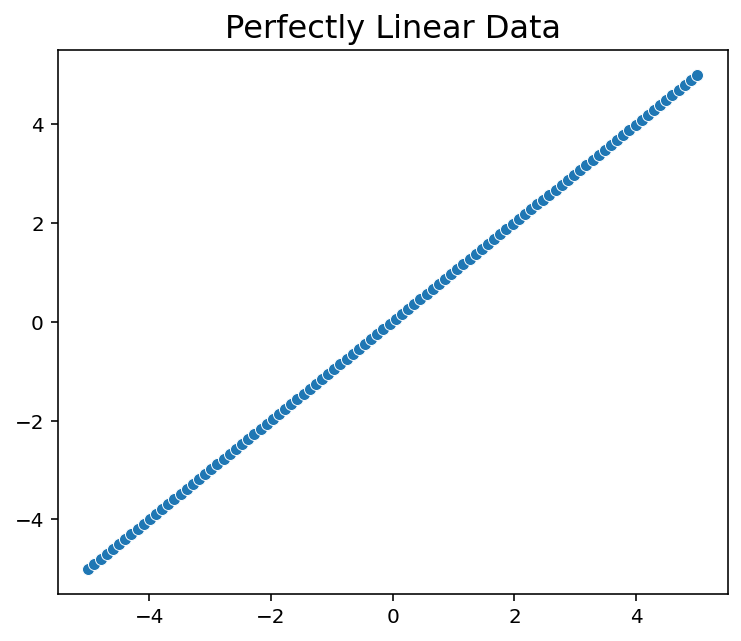

In [2]:
x = np.linspace(start=-5., stop=5., num=100)
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.scatterplot(x=x, y=x)
_ = ax.set_title("Perfectly Linear Data", size=16)

##### Now we will apply an activation function known as the "Sigmoid" activation function and observe how the data changes
- Pay attention to the shape of the data as well as the range of values on the Y-Axis

In [3]:
#defining the Sigmoid activation function
def sigmoid(x):
    return 1./(1+np.exp(-x))

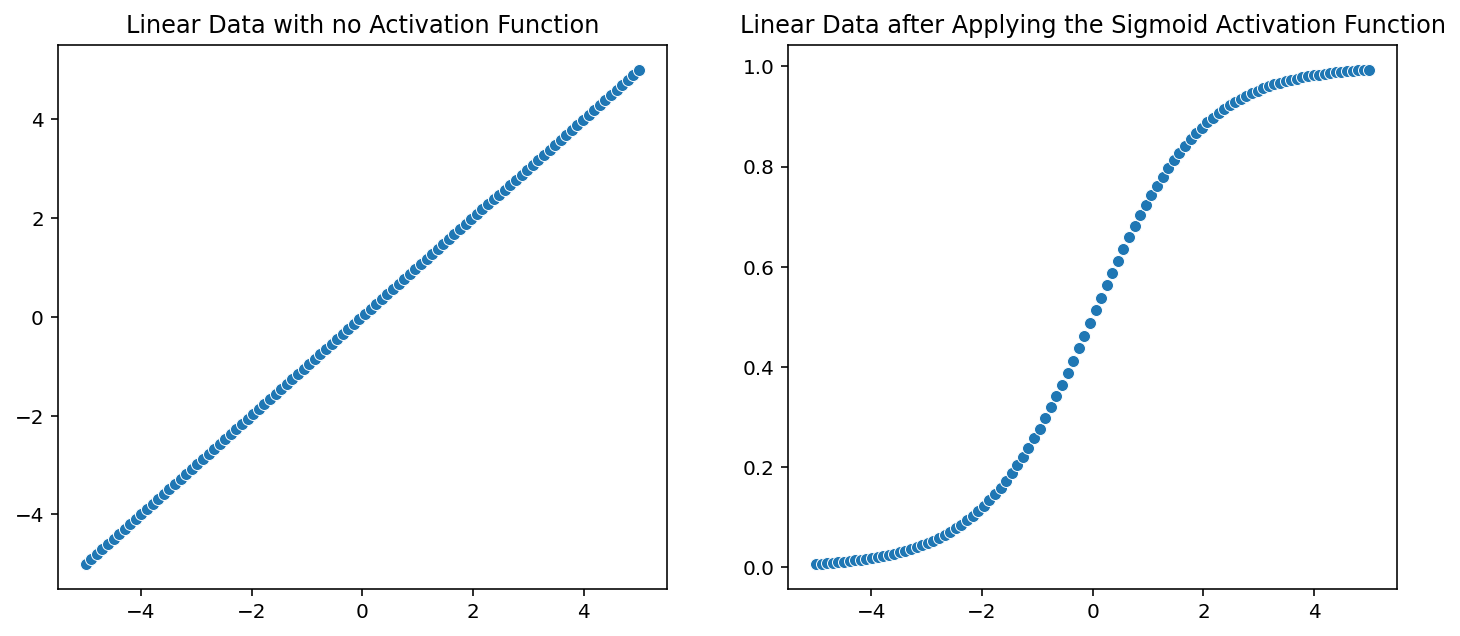

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.scatterplot(x=x, y=x, ax=axes[0])
sns.scatterplot(x=x, y=sigmoid(x), ax=axes[1])
_ = axes[0].set_title("Linear Data with no Activation Function", size=12)
_ = axes[1].set_title("Linear Data after Applying the Sigmoid Activation Function", size=12)

##### Now take a minute to think about how the data changes...

<br><br><br><br><br><br><br><br><br><br>




- Did you notice how the data is now completely transformed and now has an "S" shaped curve, which is non-linear
- The range of the data changes as well, previously it had a minimum of -5 and a maximum of 5, but has now been mapped in to the range of 0-1, which is a the desired range for Sigmoid output

##### Now we will Explore the Effect of using Different Activation Functions: Sigmoid, Tanh, ReLU, and Leaky ReLU
- Try to observe how the Sigmoid and Tanh activation functions are different
- See if you can spot the subtle differences between the ReLU and Leaky ReLU activation functions

In [5]:
#defining tanh activation function
def tanh(x):
    return ((e ** x) - (e ** -x)) / ((e ** x) + (e ** -x))

In [6]:
#defining ReLU activation function
def relu(x) :
    return np.where(x>0,x,0)

In [7]:
#defining Leaky ReLU activation function
def leaky_relu(x) :
    return np.where(x > 0, x, x * 0.01)

In [8]:
#defining Linear activation
def linear(x):
    return x

In [9]:
activations_dict = {'Sigmoid':sigmoid,'Tanh':tanh,'ReLU': relu,'Leaky ReLU':leaky_relu}

In [10]:
def play_with_activations(activation_dict, x):
    out = widgets.Output()

    def plot_function(*args):
        with out:
            if drop_down_widget.value == '':
                return
            out.clear_output()
            fig, axes = plt.subplots(nrows=1, ncols= 2, figsize=(12, 5))
            sns.scatterplot(x=x, y=x, ax=axes[0])
            sns.scatterplot(x=x, y=activation_dict[drop_down_widget.value](x), ax=axes[1])
            axes[0].set_title('Original Linear Data', size=12)
            axes[1].set_title(f'Data After Applying {drop_down_widget.value} Function', size=12)
            display(fig)
            
    drop_down_widget = widgets.Dropdown(options=['','Tanh','Sigmoid','ReLU'],
                                        value='',
                                        disabled=False)
    choose_activation = (widgets.HBox([widgets.Label("Choose your Activation Function:", \
                                 layout=widgets.Layout(width='200px')), \
                                 drop_down_widget]))
    drop_down_widget.observe(plot_function)

    display(choose_activation)
    display(out)

In [11]:
play_with_activations(activations_dict, x)

Output()

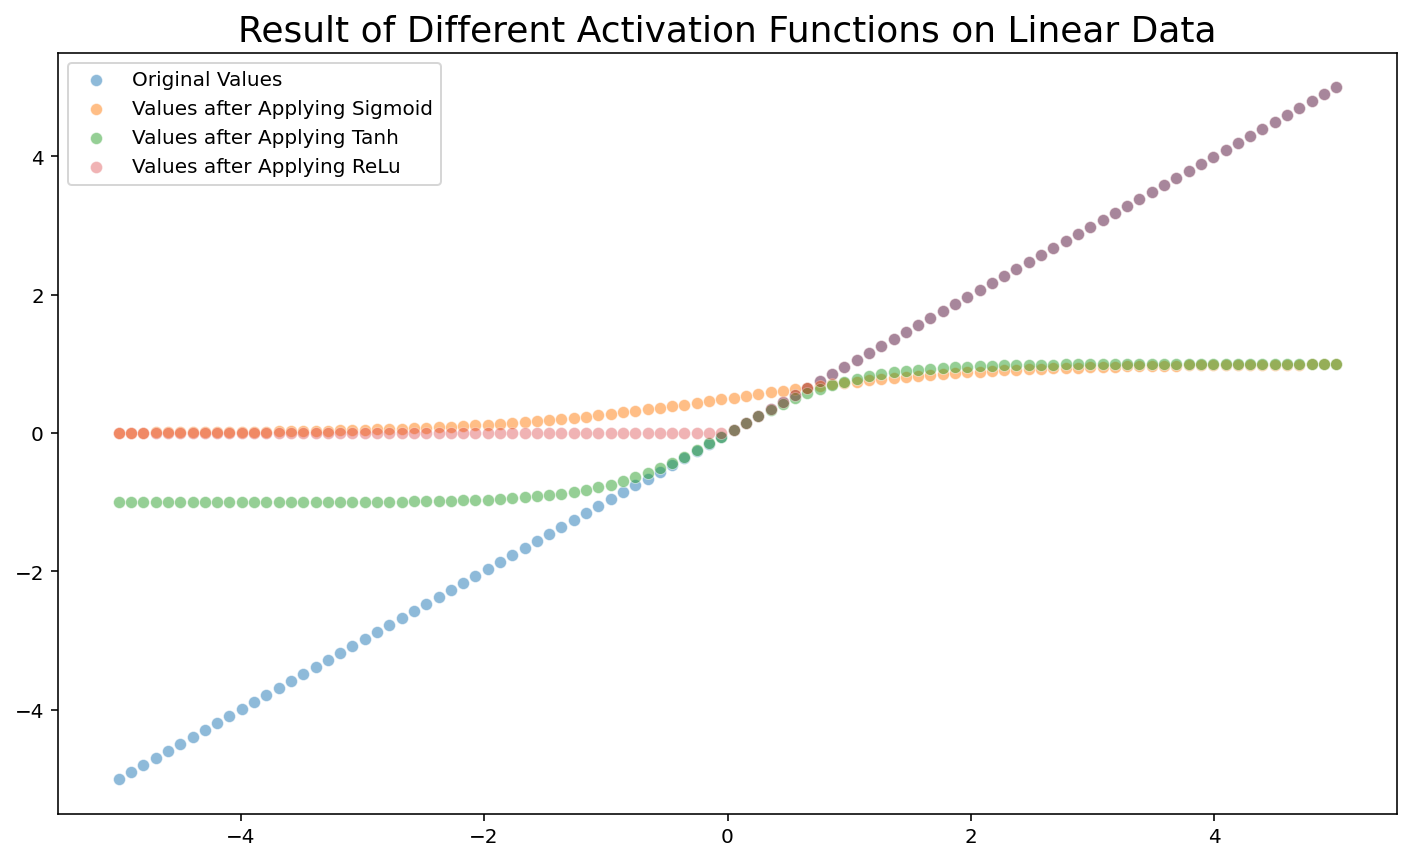

In [12]:
fig, ax = plt.subplots(figsize=(12,7))
ax = sns.scatterplot(x=x, y=x,alpha=0.5,label='Original Values');
ax = sns.scatterplot(x=x, y=sigmoid(x),alpha=0.5,label='Values after Applying Sigmoid');
ax = sns.scatterplot(x=x, y=tanh(x),alpha=0.5,label='Values after Applying Tanh');
ax = sns.scatterplot(x=x, y=relu(x),alpha=0.35,label='Values after Applying ReLu');
_ = ax.set_title("Result of Different Activation Functions on Linear Data", size=18)

##### Now that we have learned about neurons and activation functions we are ready to explore their potential and build some simple neural networks!
- The function below will create a neuron for us
- It takes in a set of inputs; represented by X, a set of weights; represented by W, and a specific activation function, like ReLU or Sigmoid
- It will multiply the inputs by the weights and then sum them together
- The neuron then uses the activation function to transform the data as we just learned about
- The neuron also adds a value called the "bias" to the inputs, which helps to ensure flexibly in the neuron. You can think of this bias as being similar to the Y-Intercept in the y=mx + b equation


In [13]:
# function creating our artifical neuron
def neuron(X, W, activation=relu):
    X=np.array(X)                     # Inputs
    W=np.array(W)                     # Weights
    X_biased   = np.append(X,(1));    # Adding Bias
    X_weighted = X_biased * W;        # Combining the X values and their weights by multiplying them together
    X_sum = np.sum(X_weighted);       # Sum
    output = activation(X_sum);       # Activation Function
    return output                     # Output

##### Now we are going to create our first Neural Network which will predict height based on age
- It will be very simple and consist of just one node
- We will adjust the network's weights to explore how this changes the predictions
- Our goal is to find the weights that minimize the model's error
- This is essentially the same process a Neural Network performs when it trains itself: finding the values for weights that minimize the predicted error

In [14]:
#this function creates our one node network
def one_node_network(X, w1, w2, w3, w4, activation=relu):
    Y = neuron(X, (w1, w2), activation=activation);
    output = neuron(Y, (w3, w4), activation=linear);
    return output

In [15]:
def normalize(x):
    rv = x/np.std(x)
    rv = rv-np.min(rv)
    return rv

In [16]:
ages = np.array((8,9,10,11,12,13,14,15,16,17,18,19))
heights = np.array((7.8, 7.9, 8.1, 8.2, 8.8, 9.7, 10.9, 13.1, 14.2, 15.8, 17.8, 19.5))

X_samples = normalize(ages);
Y_actual = normalize(heights);
X_samples2 = np.arange(-1,4,.02)


def show_one_node_network(w1=1.33, w2=-1.44,w3=1,w4=0, activation='ReLU'):
    Y_predictions = list(one_node_network(X, w1, w2, w3, w4, activations_dict[activation]) for X in X_samples);
    fig, ax = plt.subplots(figsize=(12,5))
    sns.scatterplot(x=X_samples,y=Y_predictions, ax=ax, label='Predicted Height')
    sns.scatterplot(x=X_samples,y=Y_actual,ax=ax, label='Actual Height Values')
    Y_predictions2 = list(one_node_network(X, w1, w2, w3, w4, activations_dict[activation]) for X in X_samples2);
    sns.lineplot(x=X_samples2,y=Y_predictions2, ax=ax, label = 'Model')
    
    ax.set_ylabel("Height", size=16)
    ax.set_xlabel("Age", size=16)

    rms_error = np.sqrt(((Y_predictions - Y_actual) ** 2).mean())
    plt.title(f"Model Error: {rms_error:.2f}")
    plt.legend()

interact(
    show_one_node_network,
    w1=(-2,2,.01),
    w2=(-2,2,.01),    
    w3=(-2,2,.01),
    w4=(-2,2,.01),
    activation=['Sigmoid','Tanh', 'ReLU']);

interactive(children=(FloatSlider(value=1.33, description='w1', max=2.0, min=-2.0, step=0.01), FloatSlider(val…

##### Now we will define a slightly more complex network that contains two nodes
- This will give our network more flexibility and it should be able to fit itself to the data better
- If you pay attention the Model Error you can notice that the two node network is able to achieve a smaller error than the more simple single node network

In [17]:
def two_node_network(X, w1, w2, w3, w4, w5, w6, w7, activation=relu):
    y1 = neuron(X, (w1, w2), activation);
    y2 = neuron(X, (w3, w4), activation);
    output = neuron((y1,y2), (w5, w6, w7), linear)
    return output

In [18]:
def show_two_node_network(w1=1.08, w2=-1.40, w3 = 0.29, w4 = -0.10, w5=1, w6=1, w7=0, activation='ReLU'):
    Y_predictions = list(two_node_network(X, w1, w2, w3, w4, w5, w6, w7, activations_dict[activation]) for X in X_samples);
    fig, ax = plt.subplots(figsize=(12,3))
    sns.scatterplot(x=X_samples,y=Y_predictions, ax=ax, label='Predicted Height')
    sns.scatterplot(x=X_samples,y=Y_actual,ax=ax, label='Actual Height Values')

    Y_predictions2 = list(two_node_network(X, w1, w2, w3, w4, w5, w6, w7, activations_dict[activation]) for X in X_samples2);
    sns.lineplot(x=X_samples2,y=Y_predictions2, ax=ax, label = 'Model')
    
    ax.set_ylabel("Height", size=16)
    ax.set_xlabel("Age", size=16)

    rms_error = np.sqrt(((Y_predictions - Y_actual) ** 2).mean())
    plt.title(f"Model Error: {rms_error:.2f}")
    plt.legend()

interact(
    show_two_node_network,
    w1=(-2,2,.01),
    w2=(-2,2,.1),
    w3=(-2,2,.01),
    w4=(-2,2,.1),
    w5=(-2,2,.1),
    w6=(-2,2,.1),
    w7=(-2,2,.1),
    activation=['Sigmoid','Tanh', 'ReLU']);

interactive(children=(FloatSlider(value=1.08, description='w1', max=2.0, min=-2.0, step=0.01), FloatSlider(val…

### Now we'll look at a Neural Network throughout its training cycle
- It follows a similar process to the way we found the best weights ourselves. 
- At first the network knows nothing about the correct weights, but it gradually adjusts them throughout its training.
- When the network adjusts a weight it measures the amount of error that corresponds to the change. 
- If the error decreases the network knows its heading in the right direction, if the error increases then it knows to change the weight in the opposite direction. 
- This is similar to playing the game "hot and cold"; when you're searching and someone tells you you're cold you take big steps and try changing your direction to get closer to the object. Once you start getting warmer you know you're heading in the right direction and begin to take smaller steps so you don't "overshoot" the object.




In [19]:
X = normalize(ages);
y = normalize(heights);
net = simple_neural_net(lr=0.1,epochs=10001,activation='leaky_relu')
net.fit(X,y)

In [52]:
net_widget = interactive(net.plot_fitted_vals, X=fixed(X), y=fixed(y), training=(0,10000,1), activation=['sigmoid','tanh','relu','leaky_relu'])
net_widget.children[0].layout = widgets.Layout(width='750px')
display(net_widget)

interactive(children=(IntSlider(value=0, description='training', layout=Layout(width='750px'), max=10000), Out…